## Numerical Computation with Python `scipy` and `numpy`
Gao Yang

### The Newton Method

$f(x)$在$x=x_0$附近的泰勒展开：

$$
f(x)=f(x_0)+f'(x_0)(x-x_0)+\frac{f^{(2)}(x_0)}{2}(x-x_0)^2+\cdots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n
$$

$f^{(n)}(x)$是$f(x)$的$n$阶导数

只取前两项：

$$
f(x)\approx f(x_0)+f'(x_0)(x-x_0)
$$

代入$f(x)=0$：
$$
f(x_0)+f'(x_0)(x-x_0)=0
$$

$$
x=x_0-\frac{f(x_0)}{f'(x_0)}
$$

将新的$x$代入$f(x)$，可得迭代式：
$$
x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}
$$

#### 1, 求平方根 $x^2=a$

In [103]:
def square(a):
    x0 = 10 #初始点，也可以是别的值
    x1 = x0-(x0**2-a)/(2*x0)
    i=0
    while abs(x1-x0)>1e-5:
        x0 = x1
        x1 = x0-(x0**2-a)/(2*x0)
        # 输出精确到小数点后四位
        print('迭代第{}次，解={:.4f}'.format(i,x1))
        i=i+1
square(2)

迭代第0次，解=2.7461
迭代第1次，解=1.7372
迭代第2次，解=1.4442
迭代第3次，解=1.4145
迭代第4次，解=1.4142
迭代第5次，解=1.4142


#### 2, 高次方程 $ax^3+bx^2+cx+d=0$

$x^3+2x^2+3x+4=0$

函数单调递增，只有一个解$x=-1.65$

In [12]:
def cubic(a,b,c,d,x0):
    x1 = x0-(a*x0**3+b*x0**2+c*x0+d)/(3*a*x0**2+2*b*x0+c)
    i=0
    while abs(x1-x0)>1e-5:
        x0 = x1
        x1 = x0-(a*x0**3+b*x0**2+c*x0+d)/(3*a*x0**2+2*b*x0+c)
        print('迭代第{}次，解={:.6f}'.format(i,x1))
        i=i+1
cubic(1,2,3,4,x0=10000)


迭代第0次，解=4444.073994
迭代第1次，解=2962.493690
迭代第2次，解=1974.773446
迭代第3次，解=1316.293221
迭代第4次，解=877.306310
迭代第5次，解=584.648228
迭代第6次，解=389.542628
迭代第7次，解=259.471908
迭代第8次，解=172.757613
迭代第9次，解=114.947356
迭代第10次，解=76.406080
迭代第11次，解=50.710214
迭代第12次，解=33.577052
迭代第13次，解=22.150932
迭代第14次，解=14.527193
迭代第15次，解=9.434521
迭代第16次，解=6.022567
迭代第17次，解=3.719057
迭代第18次，解=2.131402
迭代第19次，解=0.972049
迭代第20次，解=-0.028110
迭代第21次，解=-1.383584
迭代第22次，解=-1.704367
迭代第23次，解=-1.652433
迭代第24次，解=-1.650631
迭代第25次，解=-1.650629


$x^3-10x+9=0$

解不唯一，随着初始值变化。

In [15]:
cubic(1,0,-10,9,x0=2)

迭代第0次，解=2.869159
迭代第1次，解=2.601911
迭代第2次，解=2.544134
迭代第3次，解=2.541387
迭代第4次，解=2.541381


In [16]:
cubic(1,0,-10,9,x0=0)

迭代第0次，解=0.996301
迭代第1次，解=0.999994
迭代第2次，解=1.000000


In [17]:
cubic(1,0,-10,9,x0=-2)

迭代第0次，解=-8.534605
迭代第1次，解=-6.005763
迭代第2次，解=-4.503177
迭代第3次，解=-3.769710
迭代第4次，解=-3.559084
迭代第5次，解=-3.541501
迭代第6次，解=-3.541381
迭代第7次，解=-3.541381


两个极值点$a_1=-1.82,a_2=1.82$把$R$分割成三个区间。

![](./Data/JZ.png)

初值选在哪个单调区间，才会求出该单调区间的解。

$x_0=2\in [a_2,\infty)\rightarrow x=2.54$

$x_0=0\in [a_1,a_2)\rightarrow x=1$

$x_0=-2\in [-\infty,a_1)\rightarrow x=-3.54$

![](./Data/3p.png)


练习：选取不同的初值，解出方程：

$$
-2x^3+6x+1=0
$$

的3个解。

用`sympy`求解，检验牛顿迭代的正确性

In [110]:
from sympy import *
x= symbols('x')
print('方程的解：')
a=solveset(x**3+2*x**2+3*x+4, x, domain = Reals) 
print(float(list(a)[0])) # 把解变为小数

方程的解：
-1.6506291914393882


#### 3, 解方程组 

Jacobian matrix:

设 $\boldsymbol{x} \in \mathbb{R}^m$ 为 $m$ 维列向量, $\boldsymbol{x}=\left[\begin{array}{c}x_1 \\ x_2 \\ \vdots \\ x_m\end{array}\right], \boldsymbol{f}(\boldsymbol{x}) \in \mathbb{R}^n$ 为 $n$ 维列向量函数,
$\boldsymbol{f}(\boldsymbol{x})=\left[\begin{array}{c}f_1(\boldsymbol{x}) \\ f_2(\boldsymbol{x}) \\ \vdots \\ f_n(\boldsymbol{x})\end{array}\right]$, 

则 $\boldsymbol{f}(\boldsymbol{x})$ 对 $\boldsymbol{x}$ 的偏导数, 也称为 $\boldsymbol{f}(\boldsymbol{x})$ 对 $\boldsymbol{x}$ 的雅可比, 常记为 $\boldsymbol{f}_{\boldsymbol{x}}(\boldsymbol{x})$, 即
$$
\boldsymbol{f}_{\boldsymbol{x}}(\boldsymbol{x})=\frac{\partial \boldsymbol{f}(\boldsymbol{x})}{\partial \boldsymbol{x}}=\left[\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_m} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_m} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_m}
\end{array}\right] \in \mathbb{R}^{n \times m}
$$
结果为 $n \times m$ 的矩阵函数, 即雅可比矩阵的取值依赖于 $\boldsymbol{x}$ 的取值。


示例：

$$
\left \{ 
\begin{array}{c}
x_0^3-x_1^2+1=0 \\ 
x_0^2-2x_1-1=0
\end{array}
\right.
$$

$$
\boldsymbol{f}_{\boldsymbol{x}}(\boldsymbol{x})=\frac{\partial \boldsymbol{f}(\boldsymbol{x})}{\partial \boldsymbol{x}}=\left[\begin{array}{cccc}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_m} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_m} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_m}
\end{array}\right]=\left[\begin{array}{cccc}
3x_0^2 & -2x_1 \\
2x_0^2 & -2\\ \end{array}\right]
$$


In [115]:
# 解方程组

import numpy as np

def Fun(x,num):
    # 方程组在这里，三个变量分别是x的三个分量，num是未知数个数，这里是2，f是两个方程组
    i = num
    f = np.zeros((i),dtype=float)
    f[0] = x[0]**3-x[1]**2+1.    #x**3-y**2+1=0
    f[1] = x[0]**2-x[1]-1.    #x**2-y-1=0
    return f

#计算雅可比矩阵的逆矩阵
def dfun(x,num):                         
    df = np.zeros((num,num),dtype=float)
    dx = 0.00001                           
    x1 = np.copy(x)    #x1 = x
    for i in range(0,num):              # 求导数，i是列，j是行
        for j in range(0,num):
            x1 = np.copy(x)
            x1[j] = x1[j]+dx           #x+dx
            df[i,j] = (Fun(x1,num)[i]-Fun(x,num)[i])/dx   #f(x+dx)-f（x）/dx
    df_1 = np.linalg.inv(df)                              #计算逆矩阵
    return df_1

def Newton(x,num):
    x1 = np.copy(x)  #x1 = x   1行num列
    i = 0
    delta = np.copy(x)
    while(np.sum(abs(delta)) > 1.e-8 and i < 100):  #控制循环次数
        x1 = x-np.dot(dfun(x,num),Fun(x,num))  #公式 x_k+1 = x_k - (dF(x_k))^(-1)·F(x_k)
        delta = x1-x     #比较x的变化
        x = x1
        i = i+1
        print(x)
    return x

# 方程未知数的个数
num = 2                     
#初始值
x = np.array((-1,1), dtype=float)
print(x)
a = Newton(x,num)
print(a)


[-1.  1.]
[-1.14285918  0.28571694]
[-1.03069215  0.04974598]
[-1.00160721  0.00237137]
[-1.00000443e+00  6.30308913e-06]
[-1.00000000e+00  4.38331871e-11]
[-1.00000000e+00  2.24208859e-16]
[-1.00000000e+00  2.24208859e-16]


解得一组解：$(-1,0)$

In [113]:
import sympy
x,y = sympy.symbols('x,y')
print('方程的解：')
print(sympy.solve([x**3-y**2+1, x**2-y-1], [x,y]))

方程的解：
[(-1, 0), (0, -1), (2, 3)]


牛顿法的优点：在目标点附近收敛性很好，收敛速度快。

牛顿法的弱点：
* 初始点离最优解太远时，并不能保证收敛
* 可能迭代到极点导致导数为零

因此，经常将牛顿法和最速下降法结合起来使用，前期用最速下降法，迭代到一定程度后，改用牛顿法，可得到较好的效果。

### Integral

#### 1, Single variable: a circle

$$
S=4\int_{0}^{R}\sqrt{R^2-x^2}dx
$$

##### Using the definition of integral

In [39]:
def half_circle(x):
    return (1**2-x**2)**0.5

import numpy as np

n=10000
x=np.linspace(-1,1,n)
y=half_circle(x)
dx=1/n
s=dx*np.sum(y)
print(4*s)

3.1412751679989044


##### Using `quad` in `scipy`

In [42]:
def half_circle(x):
    return (1**2-x**2)**0.5

import numpy as np
from scipy import integrate
s,err=integrate.quad(half_circle,0,1)
print(s*4)

3.1415926535897922


#### 2, Double integral: a sphere

$$
V=\iint_{S}\sqrt{1^2-x^2-y^2}dxdy
$$

##### Using the definition of integral

方便起见，先在$[-1\leq x\leq1,-1\leq y\leq1]$内生成均匀的二维点阵

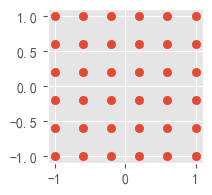

In [183]:
n=6
x=np.linspace(-1,1,n)
y=np.linspace(-1,1,n)
X,Y=np.meshgrid(x,y)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(2,2))
plt.scatter(X,Y)
plt.show()

使用`itertools.product`函数组合生成点阵的$(x,y)$坐标

再判断每个点是否在积分范围（ $xy$ 平面上的单位圆）内

In [182]:
import itertools

n=1000
def f(x,y):
    return x**2+y**2-1

def half_sphere(x,y):
    return (1-x**2-y**2)**0.5

X=np.linspace(-1,1,n)
dx=2/n
dy=2/n
a=[]

for i in itertools.product(X,X):
    if f(i[0],i[1])<=0:
        a.append(half_sphere(i[0],i[1]))

print(2*np.sum(np.array(a))*dx*dy)
print(4/3*np.pi)       


4.18041063748883
4.1887902047863905


计算值与理论值相比，在小数点后3位才出现不同。

##### Using `quad` in `scipy`

In [26]:
from scipy import integrate
import numpy as np

def half_circle(x):
    return (1-x**2)**0.5

def half_sphere(x,y):
    return (1-x**2-y**2)**0.5

# X-Y轴平面与此球体交线为一个单位圆，因此积分区间为此单位圆，可以考虑
# 为X轴坐标从-1到1进行积分，而Y轴从-half_circle(x)到half_circle(x)
#进行积分

V=integrate.dblquad(half_sphere,-1,1,
                    lambda x:-half_circle(x),
                    lambda x:half_circle(x))

print(2*V[0])

#通过球体体积公式计算
print(np.pi*4/3**1)


4.188790204786397
4.1887902047863905


##### Using `sympy`

In [35]:
from sympy import *
x,y,r=sympy.symbols("x,y,r")
2 * integrate(sqrt(r*r-x**2), (x, -r, r))
#未指定r的范围

2*Piecewise((Integral(Piecewise((-I*r/sqrt(-1 + x**2/r**2) + 3*I*x**2/(2*r*sqrt(-1 + x**2/r**2)) + I*x**2/(2*r*(-1 + x**2/r**2)**(3/2)) - I*x**4/(2*r**3*(-1 + x**2/r**2)**(3/2)), Abs(x**2/r**2) > 1), (r*sqrt(1 - x**2/r**2)/2 + r/(2*sqrt(1 - x**2/r**2)) - x**2/(2*r*sqrt(1 - x**2/r**2)), True)), (x, -r, r)), r > -r), (-Integral(Piecewise((-I*r/sqrt(-1 + x**2/r**2) + 3*I*x**2/(2*r*sqrt(-1 + x**2/r**2)) + I*x**2/(2*r*(-1 + x**2/r**2)**(3/2)) - I*x**4/(2*r**3*(-1 + x**2/r**2)**(3/2)), Abs(x**2/r**2) > 1), (r*sqrt(1 - x**2/r**2)/2 + r/(2*sqrt(1 - x**2/r**2)) - x**2/(2*r*sqrt(1 - x**2/r**2)), True)), (x, r, -r)), True))

In [34]:
from sympy import *
x,y=sympy.symbols("x,y")
r = symbols('r', positive=True)
circle_area=2*integrate(sqrt(r*r-x**2), (x, -r, r)) #圆面积
circle_area=circle_area.subs(r, sqrt(r**2-x**2)) #代换变量
integrate(circle_area, (x, -r, r))#沿着x轴积分


4*pi*r**3/3

### Linear Regression

有一堆数据点$(x_i,y_i)$，如何确定一条直线
$$
y=a x+b
$$ 
来拟合这些数据点？
找一条距离这些数据点最近的直线。
最近=距离最短
$$
d_i=\vert y_i-(a x_i+b)\vert
$$
绝对值用起来不方便，换成平方
$$
d_i^2=\left[ y_i-( a x_i+b)\right]^2
$$
总误差等于各点误差之和，总误差应该最小
$$
D(a,b)=\sum_{i=1}^{n}\left[ y_i-( a x_i+b)\right]^2
$$
（使误差平方和最小的标准称为最小二乘准则）

二元函数$D(a,b)$的极值在一阶偏导等于0处取到：

$$
\begin{align}
\frac{\partial D}{\partial a}&=-2\sum_{i=1}^{n}x_i(y_i-a x_i-b)=0 \tag 1\\
\frac{\partial D}{\partial b}&=-2\sum_{i=1}^{n}(y_i- a x_i-b)=0\tag 2\\
\end{align}
$$

由（2）解得：

$$
b=\bar y-\bar x a
$$

代入（1）得到
$$
a= \frac{\sum_{i=1}^{n}(x_iy_i-\bar x \bar y)}{\sum_{i=1}^{n}(x_i^2-\bar x^2)} 
$$

其中，

$$
\left \{ 
\begin{aligned}
\bar x&= \frac{1}{n}\sum_{i=1}^{n}x_i \\ 
\bar y&=  \frac{1}{n}\sum_{i=1}^{n}y_i 
\end{aligned}
\right.
$$

#### 0, Simple examples
| x | y    |
|---|:-----|
| 1 | 5.56 |
| 2 | 5.70 |
| 3 | 5.91 |
| 4 | 6.40 |

0.27300000000000074 5.209999999999998


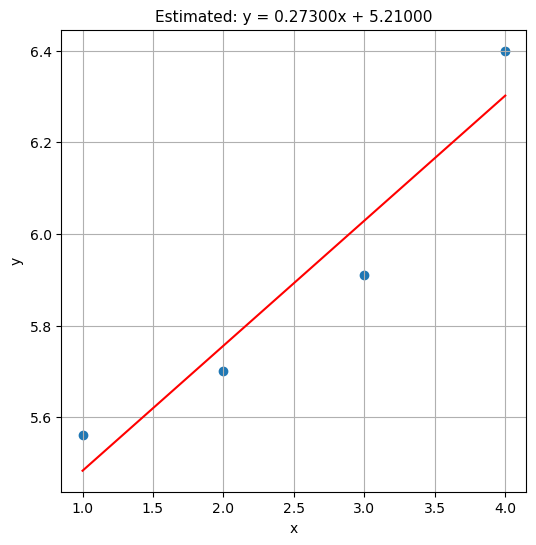

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([1,2,3,4])
y=np.array([5.56,5.70,5.91,6.40])
x_avg=np.sum(x)/x.size
y_avg=np.sum(y)/y.size
a=np.sum(x*y-x_avg*y_avg)/np.sum(x**2-x_avg**2)
b=y_avg-a*x_avg
print(a,b)

plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')
eqn = f'Estimated: y = {a:.5f}x + {b:.5f}'
plt.title(eqn, fontsize=11, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

0.4211697393515534 -8.28830260648374


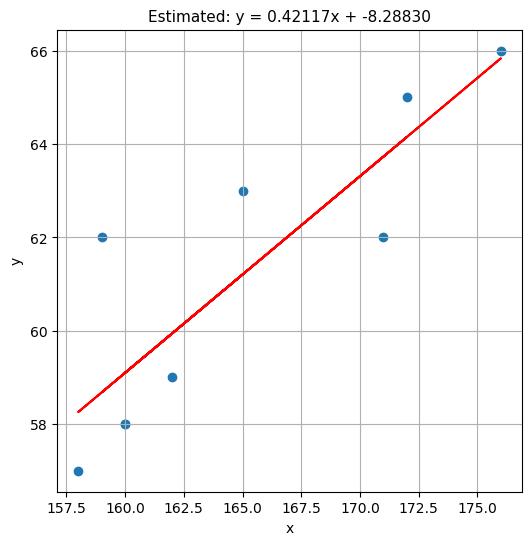

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([160,165,158,172,159,176,160,162,171])
y=np.array([58,63,57,65,62,66,58,59,62])
x_avg=np.sum(x)/x.size
y_avg=np.sum(y)/y.size
a=np.sum(x*y-x_avg*y_avg)/np.sum(x**2-x_avg**2)
b=y_avg-a*x_avg
print(a,b)

plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')
eqn = f'Estimated: y = {a:.5f}x + {b:.5f}'
plt.title(eqn, fontsize=11, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#### 1 Random numbers

In this example, we use NumPy to generate 100 random x values between 0 and 10,
 and then generate y values based on a linear relationship 
 with a slope of 2 and an intercept of 5 
 with some additional random noise added using NumPy's random.normal function. 
 We then use Matplotlib to create a scatter plot of the data points. 
 You can adjust the parameters to generate different sets of data points.
 
 (1) Generate data

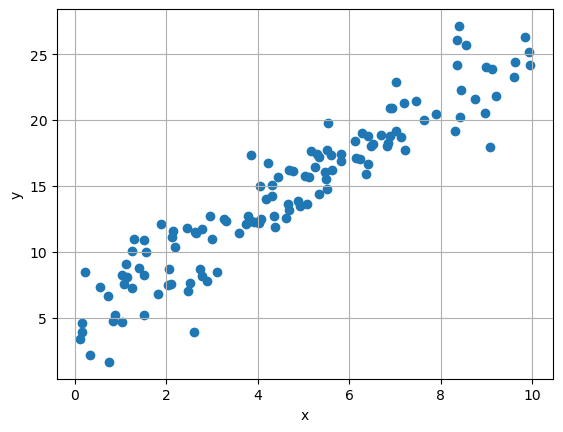

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data points for a linear regression problem
n = 128 # number of data points
x = np.random.uniform(low=0, high=10, size=n) # generate random x values between 0 and 10
real_a=2
real_b=5
y = real_a*x + real_b + np.random.normal(scale=2, size=n) # generate y values based on a linear relationship with some random noise

# Plot the data points
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

##### 用公式计算

In [21]:
x_avg=np.sum(x)/x.size
y_avg=np.sum(y)/y.size
a=np.sum(x*y-x_avg*y_avg)/np.sum(x**2-x_avg**2)
b=y_avg-a*x_avg

比较计算值和真实值

In [22]:
print(a,real_a)
print(b,real_b)

2.070377512424992 2
4.824715179864919 5


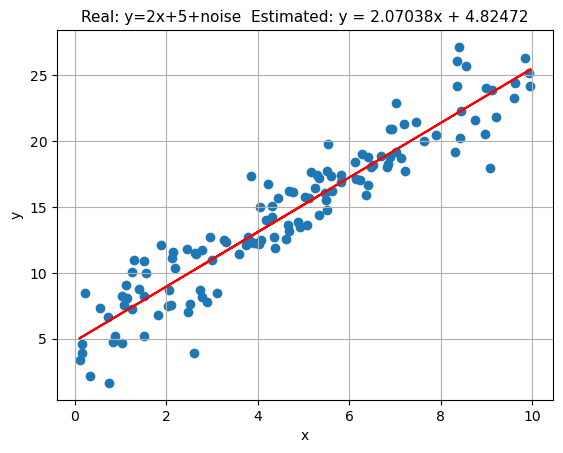

In [23]:
# Plot the fitted line and data points
plt.scatter(x, y)
plt.plot(x, a*x+b, color='red')

# Add equation of the linear regression model to the plot
eqn = f'Real: y={real_a}x+{real_b}+noise  Estimated: y = {a:.5f}x + {b:.5f}'
plt.title(eqn, fontsize=11, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

##### 用软件包计算

Intercept: 4.824715179864924
Slope: 2.0703775124249906


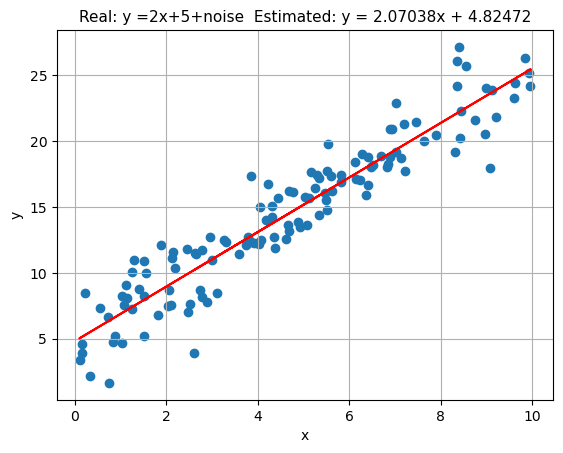

In [24]:
from sklearn.linear_model import LinearRegression

# Reshape x to a 2D array for compatibility with scikit-learn
x_reshaped = x.reshape(-1, 1)

# Fit a linear regression model to the data
model = LinearRegression().fit(x_reshaped, y)

# Print the model coefficients
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)

# Plot the fitted line and data points
plt.scatter(x, y)
plt.plot(x, model.predict(x_reshaped), color='red')

# Add equation of the linear regression model to the plot
eqn = f'Real: y ={real_a}x+{real_b}+noise  Estimated: y = {slope:.5f}x + {intercept:.5f}'
plt.title(eqn, fontsize=11, color='black')

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

#### 2, The Boston house Price

/Users/Yang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

Intercept: [-34.67062078]
Slope: [9.10210898]
Predicted house prices: [[19.94203311]
 [29.04414209]
 [38.14625107]]


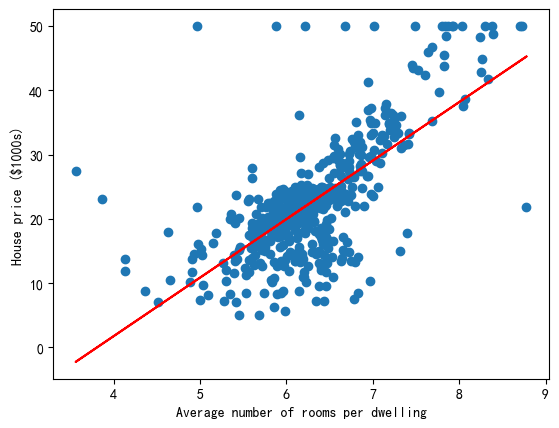

In [98]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

# Load the Boston House Prices dataset
boston = load_boston()
x = boston.data[:, 5].reshape(-1, 1) # use only the "RM" feature (average number of rooms per dwelling)
y = boston.target.reshape(-1, 1)

# Fit a linear regression model to the data
model = LinearRegression().fit(x, y)

# Print the model coefficients
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)

# Predict house prices for some test data
test_x = [[6], [7], [8]] # test data with 6, 7, and 8 rooms
test_y = model.predict(test_x)
print("Predicted house prices:", test_y)

# Plot the fitted line and data points
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('House price ($1000s)')
plt.show()

### 推荐系统、广告预估三大基础模型
* FM因子分解机
* LR逻辑斯谛回归
* GBDT

### FM因子分解机
https://zhuanlan.zhihu.com/p/145436595

### LR逻辑斯谛回归模型
https://zhuanlan.zhihu.com/p/151036015

### GBDT
https://zhuanlan.zhihu.com/p/280222403

### Non-linear equations

$$
\left \{ 
\begin{array}{c}
5x_1+3=0 \\ 
4x_0^2-2\sin(x_1x_2)=0 \\ 
x_1x_2-1.5=0
\end{array}
\right.
$$

#### 1, A direct method

In [7]:
#coding:utf-8
from scipy.optimize import fsolve
from math import sin,cos

def f(x):
    x0=float(x[0])
    x1=float(x[1])
    x2=float(x[2])
    return [
        5*x1+3,
        4*x0*x0-2*sin(x1*x2),
        x1*x2-1.5
    ]

result=fsolve(f,[1,1,1])  #输入一组可能解

print(result)
print(f(result))  #返回误差


[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


#### 2, Using Jacobian matrix

In [8]:
#coding:utf-8

from scipy.optimize import fsolve
from math import sin,cos



def f(x):
    x0=float(x[0])
    x1=float(x[1])
    x2=float(x[2])
    return [
        5*x1+3,
        4*x0*x0-2*sin(x1*x2),
        x1*x2-1.5
    ]

def j(x):
    x0 = float(x[0])
    x1 = float(x[1])
    x2 = float(x[2])

    #求每个方程的偏导数，生成雅可比矩阵
    return [
        [0,5,0],
        [8*x0, -2*x2*cos(x1*x2), -2*x1*cos(x1*x2)],
        [0,x2,x1]
    ]
#传入生成的雅可比矩阵
result=fsolve(f,[1,1,1],fprime=j)  #输入一组可能解

print(result)
print(f(result))  #返回误差


[-0.70622057 -0.6        -2.5       ]
[0.0, -9.126033262418787e-14, 5.329070518200751e-15]


### Interpolation

#### B-spline

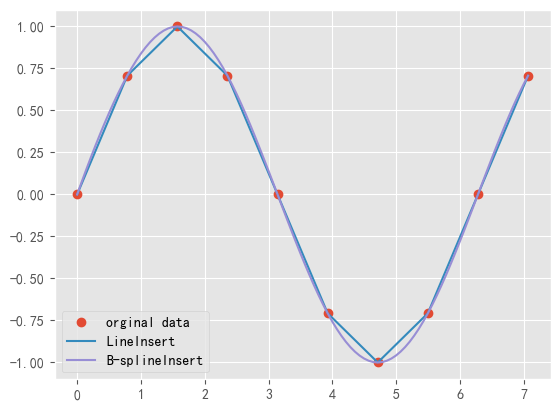

In [184]:
#coding:utf-8

import numpy as np
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
from scipy import interpolate
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签


x=np.linspace(0,2*np.pi+np.pi/4,10)
y=np.sin(x)

x_new=np.linspace(0,2*np.pi+np.pi/4,100)

#得到一个新的线性插值函数
f_linear=interpolate.interp1d(x,y)

#计算出B-Spline曲线的参数
tck=interpolate.splrep(x,y)

#将参数传递给splev函数计算出各个取样点的插值结果
y_bspline=interpolate.splev(x_new,tck)


pl.plot(x,y,"o",label="orginal data")
pl.plot(x_new,f_linear(x_new),label="LineInsert")
pl.plot(x_new,y_bspline,label="B-splineInsert")

pl.legend()
pl.show()


### Fourier 

### Ordinary Differential Equations

#### 1, 

#### 2, Lorenz

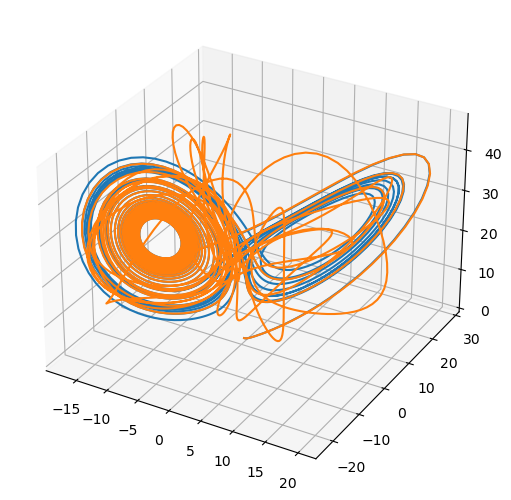

In [5]:
#coding:utf-8
from scipy.integrate import odeint
import numpy as np


def lorenz(w,t,p,r,b):
    # 给出位置矢量w和三个参数p,r,b计算出
    #dx/dtt,dy/dt/dz/dt的值

    x,y,z=w

    #直接用lorenz的计算公式对应

    return np.array([p*(y-x),x*(r-z)-y,x*y-b*z])


t=np.arange(0,30,0.01) #创建时间点

#调用ode对lorenz进行求解，用两个不同的初始值
track1=odeint(lorenz,(0.0,1.00,0.0),t,args=(10.0,28.0,3.0))
track2=odeint(lorenz,(0.0,1.01,0.0),t,args=(10.0,28.0,3.0))


#绘图
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig=plt.figure()
ax=Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(track1[:,0],track1[:,1],track1[:,2])
ax.plot(track2[:,0],track1[:,1],track1[:,2])

plt.show()


### Digital Signal Processing

#### Filter Design

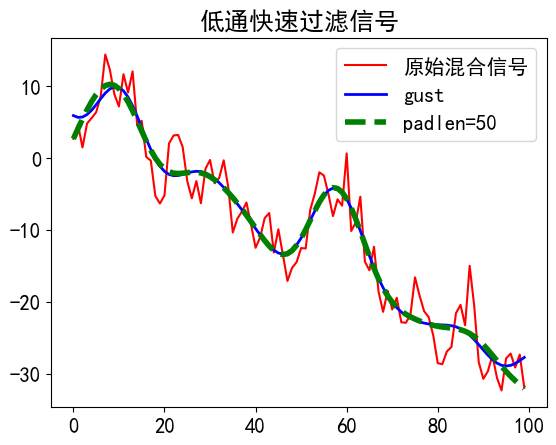

In [9]:
import matplotlib.pyplot as plt
import scipy.signal as sgn
import numpy as np

plt.rc('font', family='simhei', size=15)  # 设置中文显示，字体大小
plt.rc('axes', unicode_minus=False)  # 该参数解决负号显示的问题
# np.random.seed(29929)  # 设置random生成随机数时，每次都相同

# 创建一个低通巴特沃斯滤波器，8阶过滤器，截止频率为125Hz
b, a = sgn.butter(N=8, Wn=0.125, btype='lowpass', analog=False, output='ba')
n = 100  # 样本数100个
sig = np.random.randn(n)**2 + 3*np.random.randn(n).cumsum()  # 建立一个由两个随机标准正态分布叠加的混合信号
f_gust = sgn.filtfilt(b=b, a=a, x=sig, method='gust')  # 基于Gustafsson方法信号快速两次应用过滤
f_pad = sgn.filtfilt(b=b, a=a, x=sig, padlen=50)  # 信号快速两次应用过滤，padlen样本信号x两端扩展45个元素<n

plt.figure(num=1)
plt.plot(sig, 'r-', label='原始混合信号')
plt.plot(f_gust, 'b-', lw=2, label='gust')
plt.plot(f_pad, 'g--', lw=4, label='padlen=50')
plt.legend(loc='best')
plt.title('低通快速过滤信号')

plt.show()


#### Fourier Transformation

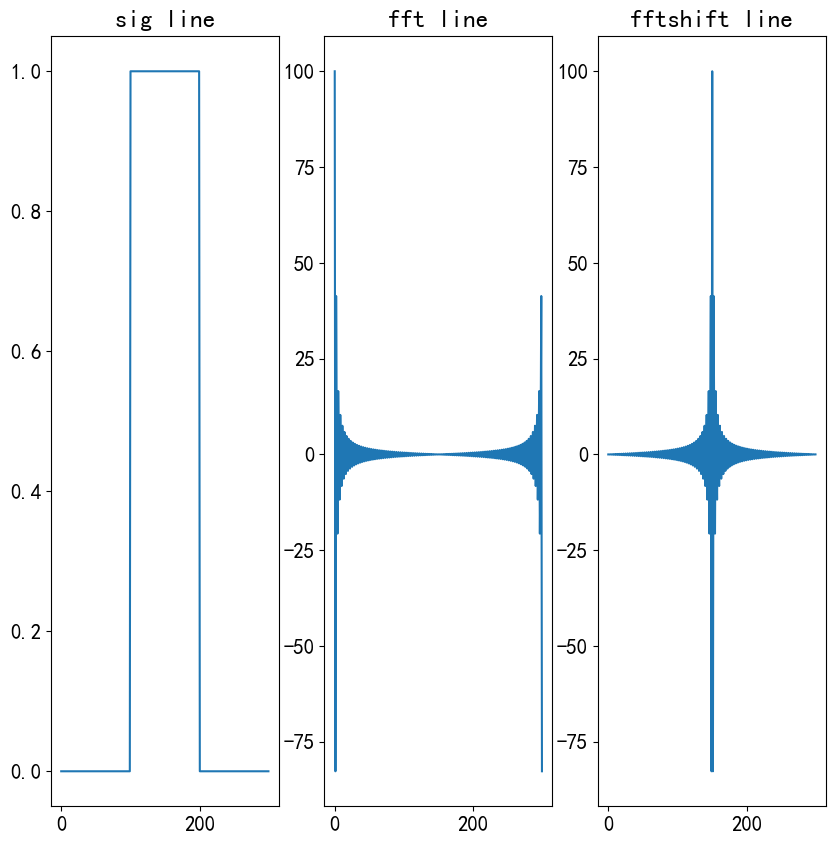

In [13]:
import scipy.fftpack as fpk
sig = np.repeat([0.0, 1.0, 0.0], 100)
A = fpk.fft(x=sig)

plt.figure(num=2, figsize=(10,10))
plt.subplot(131)
plt.plot(sig)  # 绘制原始信号
plt.title('sig line')

plt.subplot(132)
plt.plot(A)  # 绘制傅里叶变换后的信号图像
plt.title('fft line')

B = fpk.fftshift(A)
plt.subplot(133)
plt.plot(B)  # 范围调整后的傅里叶变换信号图像
plt.title('fftshift line')

plt.show()


#### Signal Window

Text(0.5, 1.0, '汉宁窗')

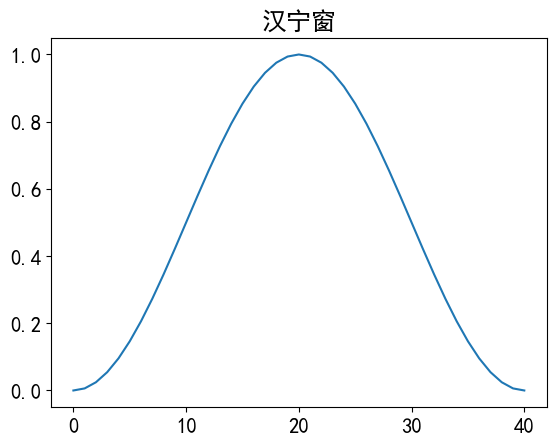

In [14]:
plt.rc('font', family='simhei', size=15)  # 设置中文显示，字体大小
plt.rc('axes', unicode_minus=False)  # 该参数解决负号显示的问题
plt.figure(num=3)
han = sgn.hann(41)
plt.plot(han)
plt.title('汉宁窗')


#### Convolution

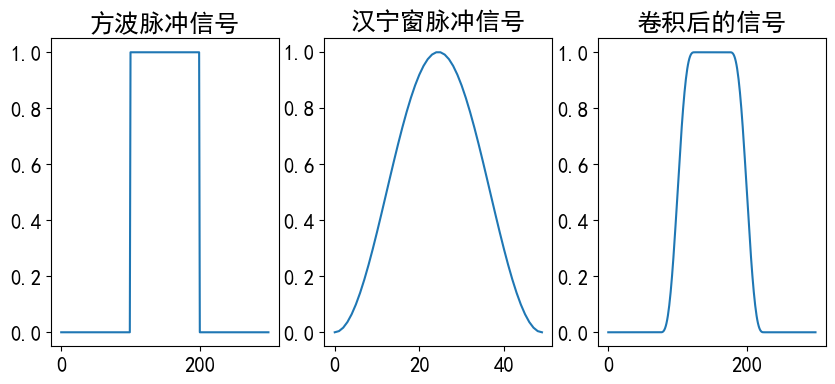

In [16]:
plt.rc('font', family='simhei', size=15)  # 设置中文显示，字体大小
plt.rc('axes', unicode_minus=False)  # 该参数解决负号显示的问题

fig = plt.figure(num=4, figsize=(10, 4))
plt.subplot(131)
sig = np.repeat([0.0, 1.0, 0.0], 100)
plt.plot(sig)
plt.title('方波脉冲信号')

han = sgn.hann(50)
plt.subplot(132)
plt.plot(han)
plt.title('汉宁窗脉冲信号')

f = sgn.convolve(in1=sig, in2=han, mode='same')/sum(han)
plt.subplot(133)
plt.plot(f)
plt.title('卷积后的信号')


plt.show()


### Refenences

* 北化苏贵福：MathSu@bilibili
* 周志华：机器学习（西瓜书）
* 百晓生：[详解 itertools 函数](zhuanlan.zhihu.com/p/51003123)